<a href="https://colab.research.google.com/github/therishabhmittal-05/Pytorch/blob/main/pytorch_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn, optim

In [2]:
from sklearn.datasets import make_circles
n_samples = 1500
X, y = make_circles(
    n_samples,
    noise=0.07,
    random_state=42
)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({'x1_cor': X[:, 0], 'x2_cor': X[:, 1], 'y': y[:]})

In [4]:
circles.head()

,x1_cor,x2_cor,y
0,-0.785851,0.060051,1
1,0.352609,-0.648894,1
2,-0.826999,-0.335800,0
3,-0.959068,-0.234201,0
4,-0.908633,-0.644666,0


In [5]:
circles.y.value_counts()

,count
y,
1,750
0,750


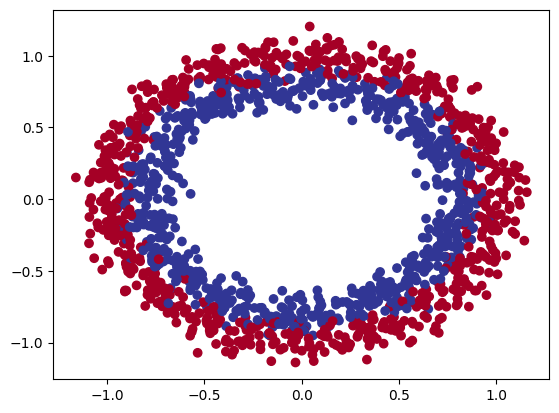

In [6]:
plt.scatter(
    x = circles.x1_cor,
    y = circles.x2_cor,
    c = circles.y,
    cmap=plt.cm.RdYlBu
)

In [7]:
X.shape, y.shape

((1500, 2), (1500,))

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, y_train.shape

(torch.Size([1200, 2]), torch.Size([1200]))

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [53]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.classifier = nn.Sequential(
        nn.Linear(in_features=2, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features= 32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=24),
        nn.ReLU(),
        nn.Linear(in_features=24, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.classifier(x)

In [54]:
model = CircleModelV0().to(device)
model

CircleModelV0(
  (classifier): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=24, bias=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [55]:
from torchsummary import summary
summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                   [-1, 32]             544
              ReLU-4                   [-1, 32]               0
            Linear-5                   [-1, 24]             792
              ReLU-6                   [-1, 24]               0
            Linear-7                    [-1, 8]             200
              ReLU-8                    [-1, 8]               0
            Linear-9                    [-1, 1]               9
          Sigmoid-10                    [-1, 1]               0
Total params: 1,593
Trainable params: 1,593
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total

In [56]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [48]:
# def accuracy_fn(y_true, y_pred):
#     y_pred = torch.round(y_pred).squeeze()
#     y_true = y_true.squeeze()
#     correct = (y_pred == y_true).sum().item()
#     total = y_true.numel()
#     accuracy = (correct / total) * 100
#     return accuracy

In [36]:
# y_logits = model(X_test.to(device))[:100]
# y_logits

In [37]:
# print(y_logits.shape, y_test[:100].shape)


In [38]:
# accuray_log = accuracy_fn(y_test[:100].to(device), y_logits.to(device))
# accuray_log

In [41]:
# !pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [57]:
from torchmetrics.classification import BinaryAccuracy
metric = BinaryAccuracy().to(device)

In [59]:
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train() # train mode
  y_pred = model(X_train).squeeze()  # forward func

  loss = criterion(y_pred, y_train) # loss
  acc = metric(y_pred, y_train) * 100 # train accuracy

  optimizer.zero_grad() # zero grad
  loss.backward() # backprop on loss

  optimizer.step() # upgrade parameters

  model.eval() # evaluation mode

  with torch.no_grad(): # no grad calculation
    test_pred = model(X_test).squeeze() # test forward
    test_loss = criterion(test_pred, y_test) # test loss
    test_acc = metric(test_pred, y_test) * 100 # test accuracy

  metric.reset()
  if epoch % 10 == 0:
    print(f"Epoch: {epoch+10} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 10 | Loss: 0.19661 | Acc: 90.83% | Test Loss: 0.21314 | Test Acc: 91.00%
Epoch: 20 | Loss: 0.19282 | Acc: 92.08% | Test Loss: 0.20662 | Test Acc: 91.33%
Epoch: 30 | Loss: 0.19123 | Acc: 92.00% | Test Loss: 0.20743 | Test Acc: 91.33%
Epoch: 40 | Loss: 0.19102 | Acc: 91.50% | Test Loss: 0.20695 | Test Acc: 91.00%
Epoch: 50 | Loss: 0.18981 | Acc: 91.58% | Test Loss: 0.20561 | Test Acc: 91.33%
Epoch: 60 | Loss: 0.19793 | Acc: 92.00% | Test Loss: 0.21132 | Test Acc: 91.33%
Epoch: 70 | Loss: 0.19211 | Acc: 92.17% | Test Loss: 0.20866 | Test Acc: 91.33%
Epoch: 80 | Loss: 0.18946 | Acc: 91.67% | Test Loss: 0.20617 | Test Acc: 91.00%
Epoch: 90 | Loss: 0.18911 | Acc: 91.75% | Test Loss: 0.20578 | Test Acc: 91.33%
Epoch: 100 | Loss: 0.19120 | Acc: 91.58% | Test Loss: 0.20754 | Test Acc: 91.33%
Epoch: 110 | Loss: 0.19203 | Acc: 92.17% | Test Loss: 0.21090 | Test Acc: 91.00%
Epoch: 120 | Loss: 0.19146 | Acc: 91.50% | Test Loss: 0.21023 | Test Acc: 91.33%
Epoch: 130 | Loss: 0.18916 | Acc: 92.